In [1]:
#!conda install contextily
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
########Recién instalados#########################
import geopandas as gpd
import geoplot 
import fiona
import requests
import contextily as cx
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [2]:
filename0 = 'solar_19661112_path.kmz'#'ASE_2023_10_14__5e21fcf6d11b9.kml'
path0 = filename0
#gpd.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
from fiona.drvsupport import supported_drivers
supported_drivers['LIBKML'] = 'rw'
#gpd.io.file.fiona.drvsupport.supported_drivers['LIBKMZ'] = 'rw'

df0 = gpd.read_file(path0)#, driver='KML')
#fig, ax = plt.subplots(figsize=(12,6))
#df0.plot(ax=ax,color='red',alpha=0.1)
print(df0.keys())
df0#.head()

Index(['Name', 'description', 'timestamp', 'begin', 'end', 'altitudeMode',
       'tessellate', 'extrude', 'visibility', 'drawOrder', 'icon', 'geometry'],
      dtype='object')


Name description timestamp begin end altitudeMode  \
0  Central path, 12 Nov 1966        None       NaT   NaT NaT         None   
1              Total eclipse        None       NaT   NaT NaT         None   
2            Partial eclipse        None       NaT   NaT NaT         None   
3               >20% eclipse        None       NaT   NaT NaT         None   
4               >40% eclipse        None       NaT   NaT NaT         None   
5               >60% eclipse        None       NaT   NaT NaT         None   
6               >80% eclipse        None       NaT   NaT NaT         None   

   tessellate  extrude  visibility drawOrder  icon  \
0          -1        0          -1      None  None   
1          -1        0          -1      None  None   
2          -1        0          -1      None  None   
3          -1        0          -1      None  None   
4          -1        0          -1      None  None   
5          -1        0          -1      None  None   
6          -1        0          -1      None  None   

                                            geometry  
0  LINESTRING (-102.74250 1.49850, -100.92520 0.8...  
1  POLYGON ((-47.80000 -35.50000, -47.93000 -35.4...  
2  POLYGON ((-98.72000 -64.45000, -98.50000 -64.8...  
3  POLYGON ((-98.70000 -32.62000, -98.35000 -32.8...  
4  POLYGON ((-98.72000 -21.43000, -98.38000 -21.6...  
5  POLYGON ((-98.72000 -13.23000, -98.38000 -13.4...  
6  POLYGON ((-98.70000 -6.38000, -98.35000 -6.530...

In [3]:
#df0.iloc[0]['geometry'].xy
df0['extrude']

0    0
1    0
2    0
3    0
4    0
5    0
6    0
Name: extrude, dtype: int64

Central path
Total eclipse
Partial eclipse
>20% eclipse
>40% eclipse
>60% eclipse
>80% eclipse


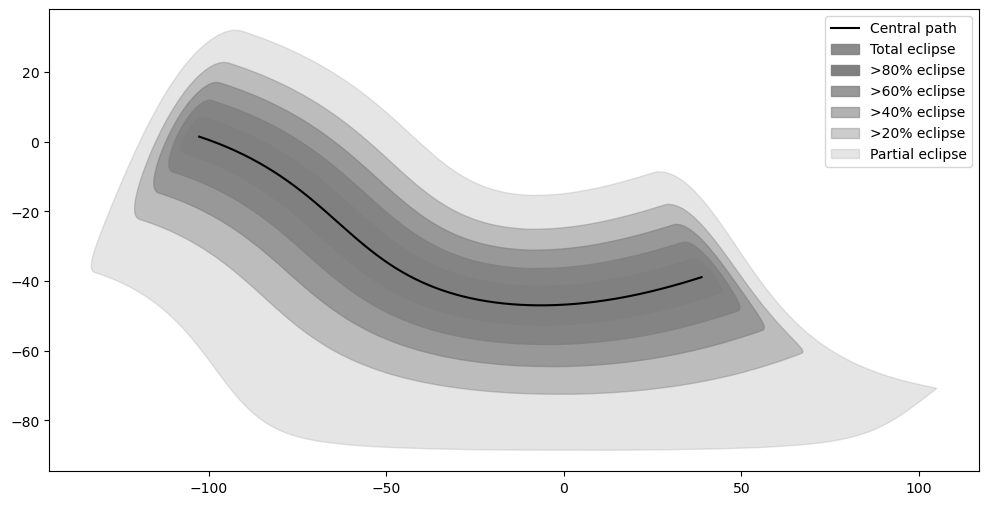

In [4]:
p0 = df0.iloc[0]['geometry']
p1 = df0.iloc[1]['geometry']
p2 = df0.iloc[2]['geometry']
p3 = df0.iloc[3]['geometry']
p4 = df0.iloc[4]['geometry']
p5 = df0.iloc[5]['geometry']
p6 = df0.iloc[6]['geometry']

label0 = df0.iloc[0]['Name']
label1 = df0.iloc[1]['Name']
label2 = df0.iloc[2]['Name']
label3 = df0.iloc[3]['Name']
label4 = df0.iloc[4]['Name']
label5 = df0.iloc[5]['Name']
label6 = df0.iloc[6]['Name']
x0,y0 = p0.xy
x1,y1 = p1.exterior.xy
x2,y2 = p2.exterior.xy
x3,y3 = p3.exterior.xy
x4,y4 = p4.exterior.xy
x5,y5 = p5.exterior.xy
x6,y6 = p6.exterior.xy
fig, ax = plt.subplots(figsize=(12,6))
#df0.plot(ax=ax,color='grey',alpha=0.04)
ax.plot(x0,y0,color='black',label=label0[:12])#,alpha=1)
ax.fill(x1,y1,color='grey',alpha=0.9,label=label1)
ax.fill(x6,y6,color='grey',alpha=1.0,label=label6)
ax.fill(x5,y5,color='grey',alpha=0.8,label=label5)
ax.fill(x4,y4,color='grey',alpha=0.6,label=label4)
ax.fill(x3,y3,color='grey',alpha=0.4,label=label3)
ax.fill(x2,y2,color='grey',alpha=0.2,label=label2)
ax.legend()
#ax.plot(x0,y0,color='blue')#,alpha=1)
#ax.plot(x1,y1,color='red')#,alpha=0.3)
#ax.plot(x2,y2,color='green')#,alpha=0.3)
#ax.plot(x3,y3,color='yellow')#,alpha=0.3)
#ax.plot(x4,y4,color='green')
#ax.plot(x5,y5,color='pink')
#ax.plot(x6,y6,color='black')

#df0.iloc[1]#.plot(column='visibility')
print(label0[:12])
print(label1)
print(label2)
print(label3)
print(label4)
print(label5)
print(label6)

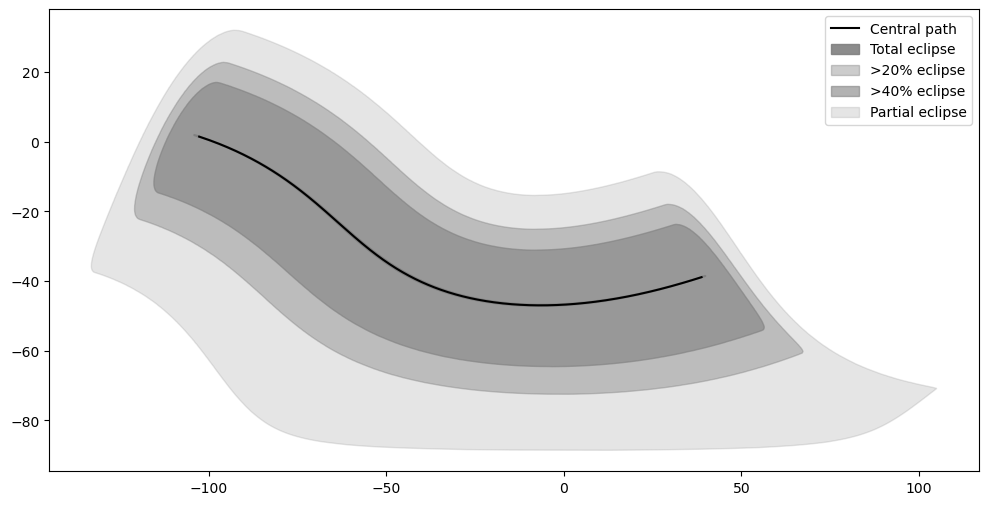

In [5]:
fig, ax = plt.subplots(figsize=(12,6))
#df0.plot(ax=ax,color='grey',alpha=0.04)
ax.plot(x0,y0,color='black',label=label0[:12])#,alpha=1)
ax.fill(x1,y1,color='grey',alpha=0.9,label=label1)
ax.fill(x3,y3,color='grey',alpha=0.4,label=label3)
ax.fill(x4,y4,color='grey',alpha=0.6,label=label4)
ax.fill(x2,y2,color='grey',alpha=0.2,label=label2)

ax.legend()

In [6]:
map = "naturalearth_lowres"#"naturalearth_lowres"
worldmap = gpd.read_file(gpd.datasets.get_path(map))
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
peru = worldmap.loc[worldmap["name"]=='Peru']
bolivia = worldmap.loc[worldmap["name"]=='Bolivia']
brazil = worldmap.loc[worldmap["name"]=='Brazil']
colombia = worldmap.loc[worldmap["name"]=='Colombia']
ecuador = worldmap.loc[worldmap["name"]=='Ecuador']
chile = worldmap.loc[worldmap["name"]=='Chile']
argentina = worldmap.loc[worldmap["name"]=='Argentina']
uruguay = worldmap.loc[worldmap["name"]=='Uruguay']
america = worldmap.loc[worldmap["continent"]=='South America']
venezuela = worldmap.loc[worldmap["name"]=='Venezuela']
paraguay = worldmap.loc[worldmap["name"]=='Paraguay']

/tmp/ipykernel_35272/1424905396.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path(map))


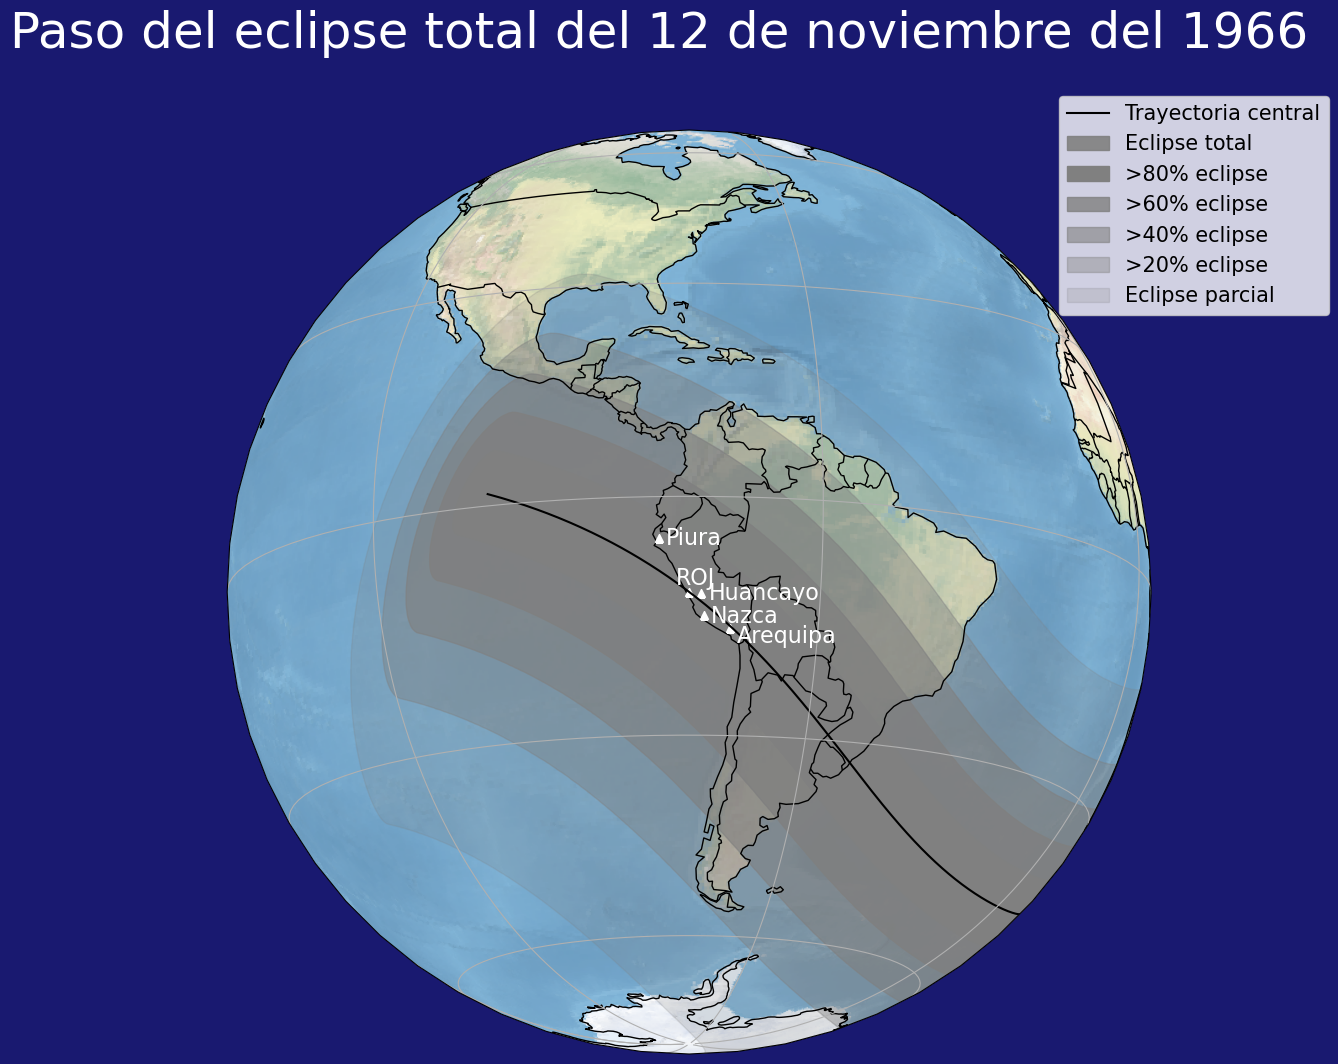

In [8]:
fontsize = 35
fontsize2 = 16
alpha=0.04
offset = 0.9#50.0
lat, lon = -11.95139,-76.87431
cmap = 'Greys_r'#'YlOrBr'#'Oranges'#'YlOrBr', 'YlOrRd'#'grey'
lat_huancayo, lon_huancayo = -12.038333, -75.322778
lat_piura, lon_piura = -5.176692, -80.634643
lat_arequipa, lon_arequipa = -16.3988900, -71.5350000
lat_nazca, lon_nazca = -14.83098, -74.93895
ortho = ccrs.Orthographic(central_longitude=lon, central_latitude=lat)
geo = ccrs.Geodetic()
color = 'white'#'black'
colored_marker = 'w^'#'k^'#'b^'
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(1, 1, 1,projection=ortho)

#df2.plot(column='Obscuratio',ax=ax,legend=False,alpha=alpha, transform=geo,cmap=cmap)#,color='grey')
#df3.plot(column='Obscuratio',ax=ax,legend=False,alpha=alpha, transform=geo,cmap=cmap)
#######df4.plot(ax=ax,transform=geo,color='brown')
#df5.plot(ax=ax,transform=geo,color='red')
#,cmap='grey',legend_kwds={"shrink":1.0,"label":'Oscurecimiento'})
ax.add_feature(cfeature.BORDERS)
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.OCEAN)
ax.gridlines()
ax.plot([lon], [lat], colored_marker, transform=geo)
ax.text(lon-1.8*offset,lat+offset,'ROJ',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_huancayo], [lat_huancayo], colored_marker, transform=geo)
ax.text(lon_huancayo+offset,lat_huancayo-offset,'Huancayo',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_piura], [lat_piura], colored_marker, transform=geo)
ax.text(lon_piura+offset,lat_piura-offset,'Piura',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_arequipa], [lat_arequipa], colored_marker, transform=geo)
ax.text(lon_arequipa+offset,lat_arequipa-2*offset,'Arequipa',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_nazca], [lat_nazca], colored_marker, transform=geo)
ax.text(lon_nazca+offset,lat_nazca-offset,'Nazca',color=color,fontsize=fontsize2, transform=geo)
#ax.text(-60.025,-3.10194,'Trayectoria',color='black',fontsize=fontsize2+5, transform=geo)
#ax.set_facecolor('blue')
#ax.set_extent((-120,-10,-60,60),crs=geo)
ax.plot(x0,y0,color='black',label='Trayectoria central', transform=geo)#,alpha=1)
ax.fill(x1,y1,color='grey',alpha=0.9,label='Eclipse total', transform=geo)
ax.fill(x6,y6,color='grey',alpha=1.0,label=label6, transform=geo)
ax.fill(x5,y5,color='grey',alpha=0.8,label=label5, transform=geo)
ax.fill(x4,y4,color='grey',alpha=0.6,label=label4, transform=geo)
ax.fill(x3,y3,color='grey',alpha=0.4,label=label3, transform=geo)
ax.fill(x2,y2,color='grey',alpha=0.2,label='Eclipse parcial', transform=geo)
ax.legend(fontsize=fontsize-20,loc=(0.9,0.8))
'''
cax = fig.add_axes([0.85, 0.085, 0.03, 0.87])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = df2['Obscuratio'].values#[]
cb = fig.colorbar(sm, cax=cax)
cb.ax.tick_params(labelsize=fontsize,color='white') 
cb.ax.set_ylabel('Oscurecimiento',fontsize=fontsize,color='white')
cbar_yticks = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')
'''
#cb.ax.yaxis.set_tick_params(color='w')
fig.suptitle('Paso del eclipse total del 12 de noviembre del 1966',fontsize=fontsize+1,color='white')#,x=0.6,y=1.05)
fig.patch.set_facecolor('midnightblue')
plt.savefig('eclipse-path-prime-12-11-1966.png',bbox_inches='tight')
plt.savefig('eclipse-path-prime-12-11-1966.pdf',bbox_inches='tight')

In [10]:
directory = '14-octubre-2023'
#### Archivo de coordenadas del ROJ
filename_jro = 'jro_coordinates.json'
######### Archivos de trayectorias y sombras ###################
filename2 = 'ppath.kml'
filename1 = 'center.kml'
filename3 = 'ppath01.kml'
filename4 = 'umbra_hi.kml'
filename5 = 'umbra_lo.kml'
filename6 = 'upath_hi.kml'
filename7 = 'upath_lo.kml'
filename8 = 'duration.kml'
####################################################################33
### Directorio + nombres de archivos
path1 = directory+os.sep+filename1
path2 = directory+os.sep+filename2
path3 = directory+os.sep+filename3
path4 = directory+os.sep+filename4
path5 = directory+os.sep+filename5
path6 = directory+os.sep+filename6
path7 = directory+os.sep+filename7
path8 = directory+os.sep+filename8

In [11]:
#gpd.io.file.fiona.drvsupport.supported_drivers['kml'] = 'rw'
#gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
###################################################################
#gpd.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
#################################################################
#fiona.drvsupport.supported_drivers['kml'] = 'rw'  # enable KML support which is disabled by default
#fiona.drvsupport.supported_drivers['KML'] = 'rw'  # enable KML support which is disabled by default
#fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'  # enable KML support which is disabled by default

In [12]:
df1 = gpd.read_file(path1)#, driver='KML')
df2 = gpd.read_file(path2)#, driver='KML')
df3 = gpd.read_file(path3)#, driver='KML')
df4 = gpd.read_file(path4)#, driver='KML')
df5 = gpd.read_file(path5)#, driver='KML')
df6 = gpd.read_file(path6)#, driver='KML')
df7 = gpd.read_file(path7)#, driver='KML')
df8 = gpd.read_file(path8)#, driver='KML')

In [13]:
#df4.plot(column='visibility',legend=True,cmap='grey',alpha=0.3)
#print(df2.keys())
#print(df2["icon"].values)
#df2['tessellate'].plot()
#.keys()
df3.head()

Name description timestamp begin end altitudeMode  tessellate  extrude  \
0  None        None       NaT   NaT NaT         None          -1        0   
1  None        None       NaT   NaT NaT         None          -1        0   
2  None        None       NaT   NaT NaT         None          -1        0   
3  None        None       NaT   NaT NaT         None          -1        0   
4  None        None       NaT   NaT NaT         None          -1        0   

   visibility drawOrder  icon  Obscuratio  \
0          -1      None  None      0.8899   
1          -1      None  None      0.8800   
2          -1      None  None      0.8700   
3          -1      None  None      0.8599   
4          -1      None  None      0.8499   

                                            geometry  
0  POLYGON ((-119.42139 43.08949, -119.37744 43.0...  
1  POLYGON ((-145.56885 50.25629, -145.52490 50.2...  
2  POLYGON ((-147.94189 51.11233, -147.89795 51.1...  
3  POLYGON ((-147.85400 51.48818, -147.81006 51.4...  
4  POLYGON ((-147.94189 51.81089, -147.89795 51.8...

<Axes: >

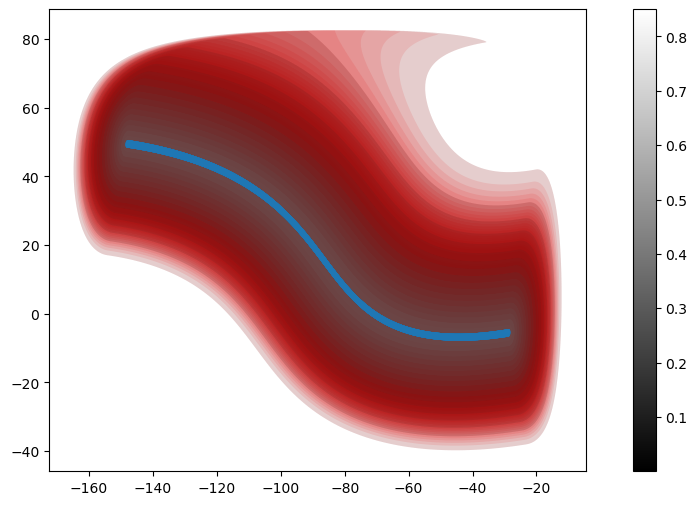

In [14]:
#print(df['geometry'].values)
fig, ax = plt.subplots(figsize=(12,6))
df3.plot(ax=ax,color='red',alpha=0.1)
df2.plot(column='Obscuratio',ax=ax,legend=True,cmap='grey',alpha=0.1)
#df4.plot(ax=ax)
df5.plot(ax=ax)
#cb = plt.colorbar(pt)#,ax=ax)
#df4.plot(ax=ax,color='red',alpha=0.7)
#df5.plot(ax=ax,color='red',alpha=0.3)
#df6.plot(ax=ax,color='gray',alpha=0.3)
#df7.plot(ax=ax,color='gray',alpha=0.3)
#df8.plot(ax=ax,color='gray',alpha=0.3)
#cb = ax.colorbar(pt)

In [15]:
vmax = np.nanmax(df2['Obscuratio'])
vmin = np.nanmin(df2['Obscuratio'])
#sm = plt.cm.ScalarMappable(cmap='grey', norm=plt.Normalize(vmin=vmin, vmax=vmax))
#sm._A = []

In [97]:
# Getting world map data from geo pandas
map = "naturalearth_lowres"#"naturalearth_lowres"
worldmap = gpd.read_file(gpd.datasets.get_path(map))
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
peru = worldmap.loc[worldmap["name"]=='Peru']
bolivia = worldmap.loc[worldmap["name"]=='Bolivia']
brazil = worldmap.loc[worldmap["name"]=='Brazil']
colombia = worldmap.loc[worldmap["name"]=='Colombia']
ecuador = worldmap.loc[worldmap["name"]=='Ecuador']
chile = worldmap.loc[worldmap["name"]=='Chile']
argentina = worldmap.loc[worldmap["name"]=='Argentina']
uruguay = worldmap.loc[worldmap["name"]=='Uruguay']
america = worldmap.loc[worldmap["continent"]=='South America']
venezuela = worldmap.loc[worldmap["name"]=='Venezuela']
paraguay = worldmap.loc[worldmap["name"]=='Paraguay']

/tmp/ipykernel_20802/3511843821.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path(map))


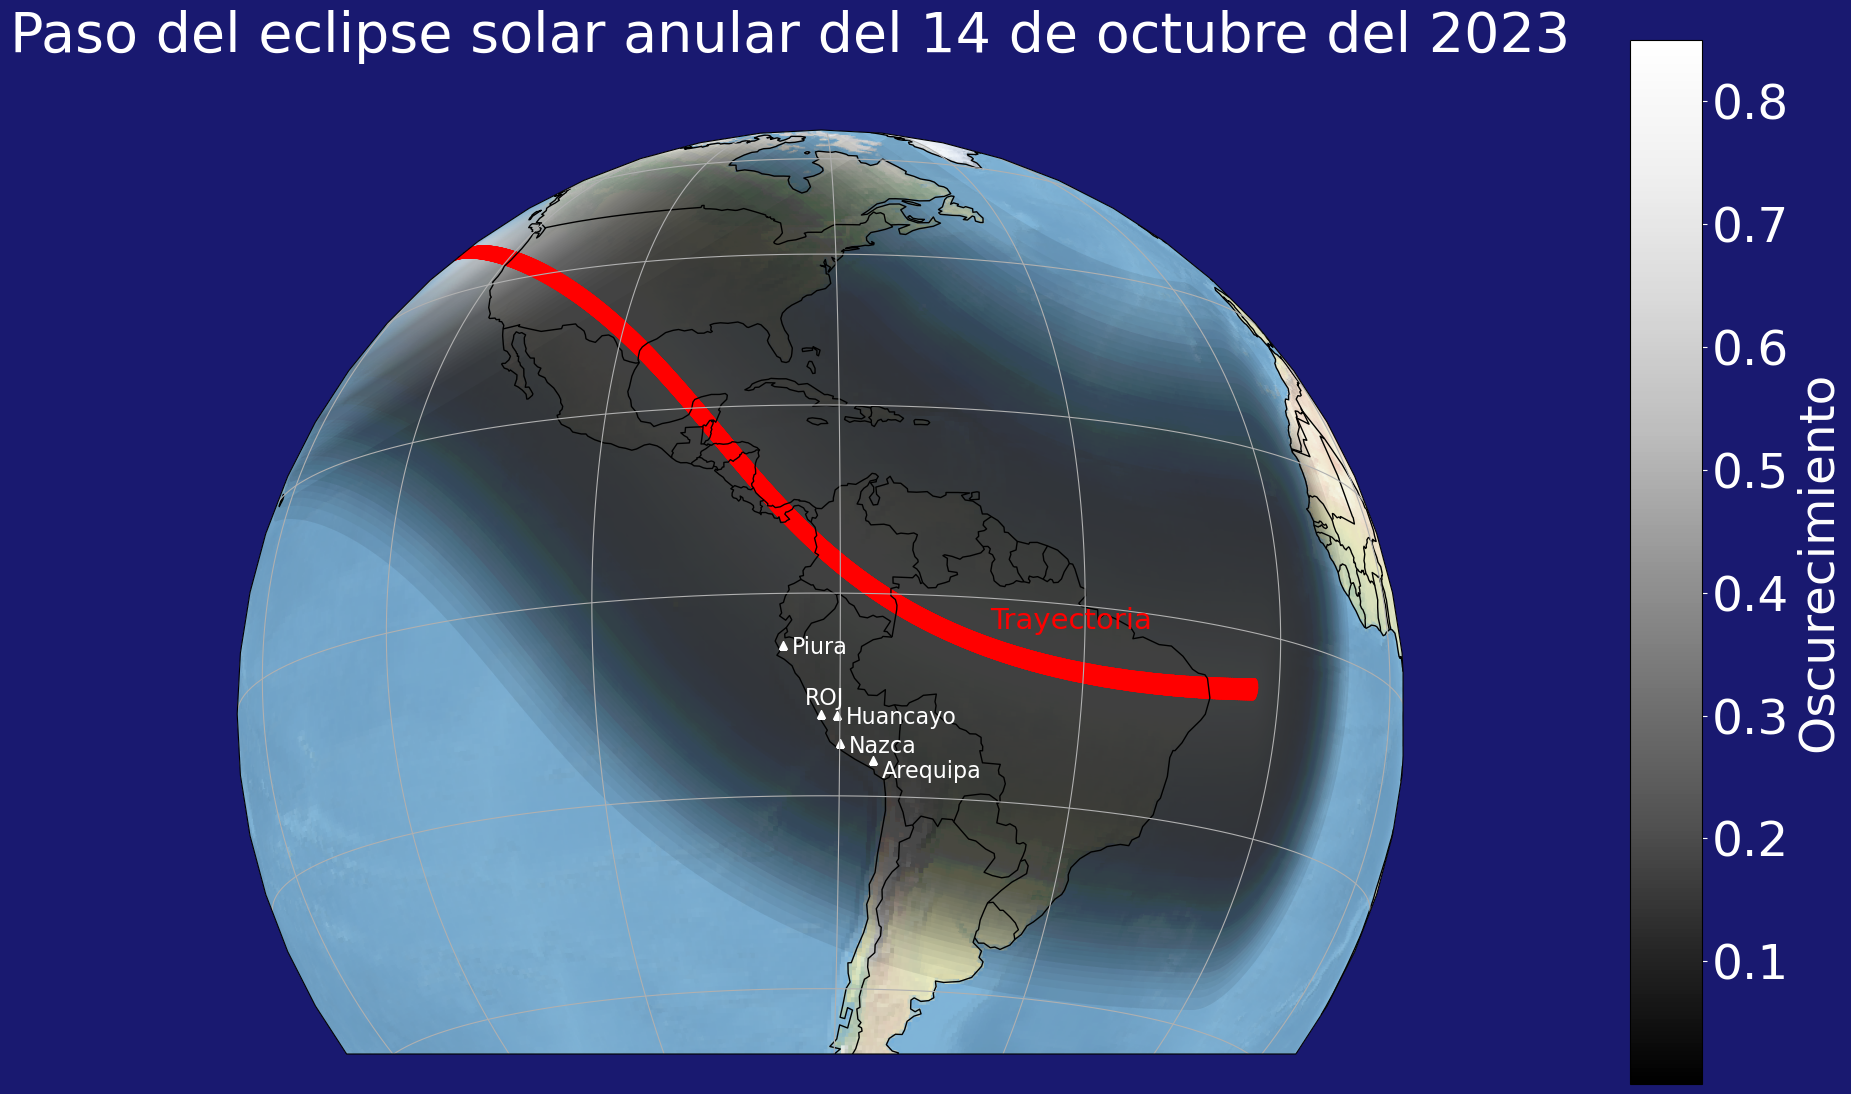

In [92]:
#dir(df2['geometry'])
fontsize = 35
fontsize2 = 16
alpha=0.04
offset = 0.9#50.0
lat, lon = -11.95139,-76.87431
cmap = 'Greys_r'#'YlOrBr'#'Oranges'#'YlOrBr', 'YlOrRd'#'grey'
lat_huancayo, lon_huancayo = -12.038333, -75.322778
lat_piura, lon_piura = -5.176692, -80.634643
lat_arequipa, lon_arequipa = -16.3988900, -71.5350000
lat_nazca, lon_nazca = -14.83098, -74.93895
ortho = ccrs.Orthographic(central_longitude=lon, central_latitude=lat)
geo = ccrs.Geodetic()
color = 'white'#'black'
colored_marker = 'w^'#'k^'#'b^'
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(1, 1, 1,projection=ortho)
df2.plot(column='Obscuratio',ax=ax,legend=False,alpha=alpha, transform=geo,cmap=cmap)#,color='grey')
df3.plot(column='Obscuratio',ax=ax,legend=False,alpha=alpha, transform=geo,cmap=cmap)
#df4.plot(ax=ax,transform=geo,color='brown')
df5.plot(ax=ax,transform=geo,color='red')
#,cmap='grey',legend_kwds={"shrink":1.0,"label":'Oscurecimiento'})
ax.add_feature(cfeature.BORDERS)
ax.coastlines()
ax.stock_img()
ax.add_feature(cfeature.OCEAN)
ax.gridlines()
ax.plot([lon], [lat], colored_marker, transform=geo)
ax.text(lon-1.8*offset,lat+offset,'ROJ',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_huancayo], [lat_huancayo], colored_marker, transform=geo)
ax.text(lon_huancayo+offset,lat_huancayo-offset,'Huancayo',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_piura], [lat_piura], colored_marker, transform=geo)
ax.text(lon_piura+offset,lat_piura-offset,'Piura',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_arequipa], [lat_arequipa], colored_marker, transform=geo)
ax.text(lon_arequipa+offset,lat_arequipa-2*offset,'Arequipa',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_nazca], [lat_nazca], colored_marker, transform=geo)
ax.text(lon_nazca+offset,lat_nazca-offset,'Nazca',color=color,fontsize=fontsize2, transform=geo)
ax.text(-60.025,-3.10194,'Trayectoria',color='red',fontsize=fontsize2+5, transform=geo)
#ax.set_facecolor('blue')
#ax.set_extent((-120,-10,-60,60),crs=geo)
cax = fig.add_axes([0.85, 0.085, 0.03, 0.87])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = df2['Obscuratio'].values#[]
cb = fig.colorbar(sm, cax=cax)
cb.ax.tick_params(labelsize=fontsize,color='white') 
cb.ax.set_ylabel('Oscurecimiento',fontsize=fontsize,color='white')
cbar_yticks = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')
#cb.ax.yaxis.set_tick_params(color='w')
fig.suptitle('Paso del eclipse solar anular del 14 de octubre del 2023',fontsize=fontsize+5,color='white')#,x=0.6,y=1.05)
fig.patch.set_facecolor('midnightblue')
plt.savefig('eclipse-path-prime-v0.png',bbox_inches='tight')
plt.savefig('eclipse-path-prime-v0.pdf',bbox_inches='tight')

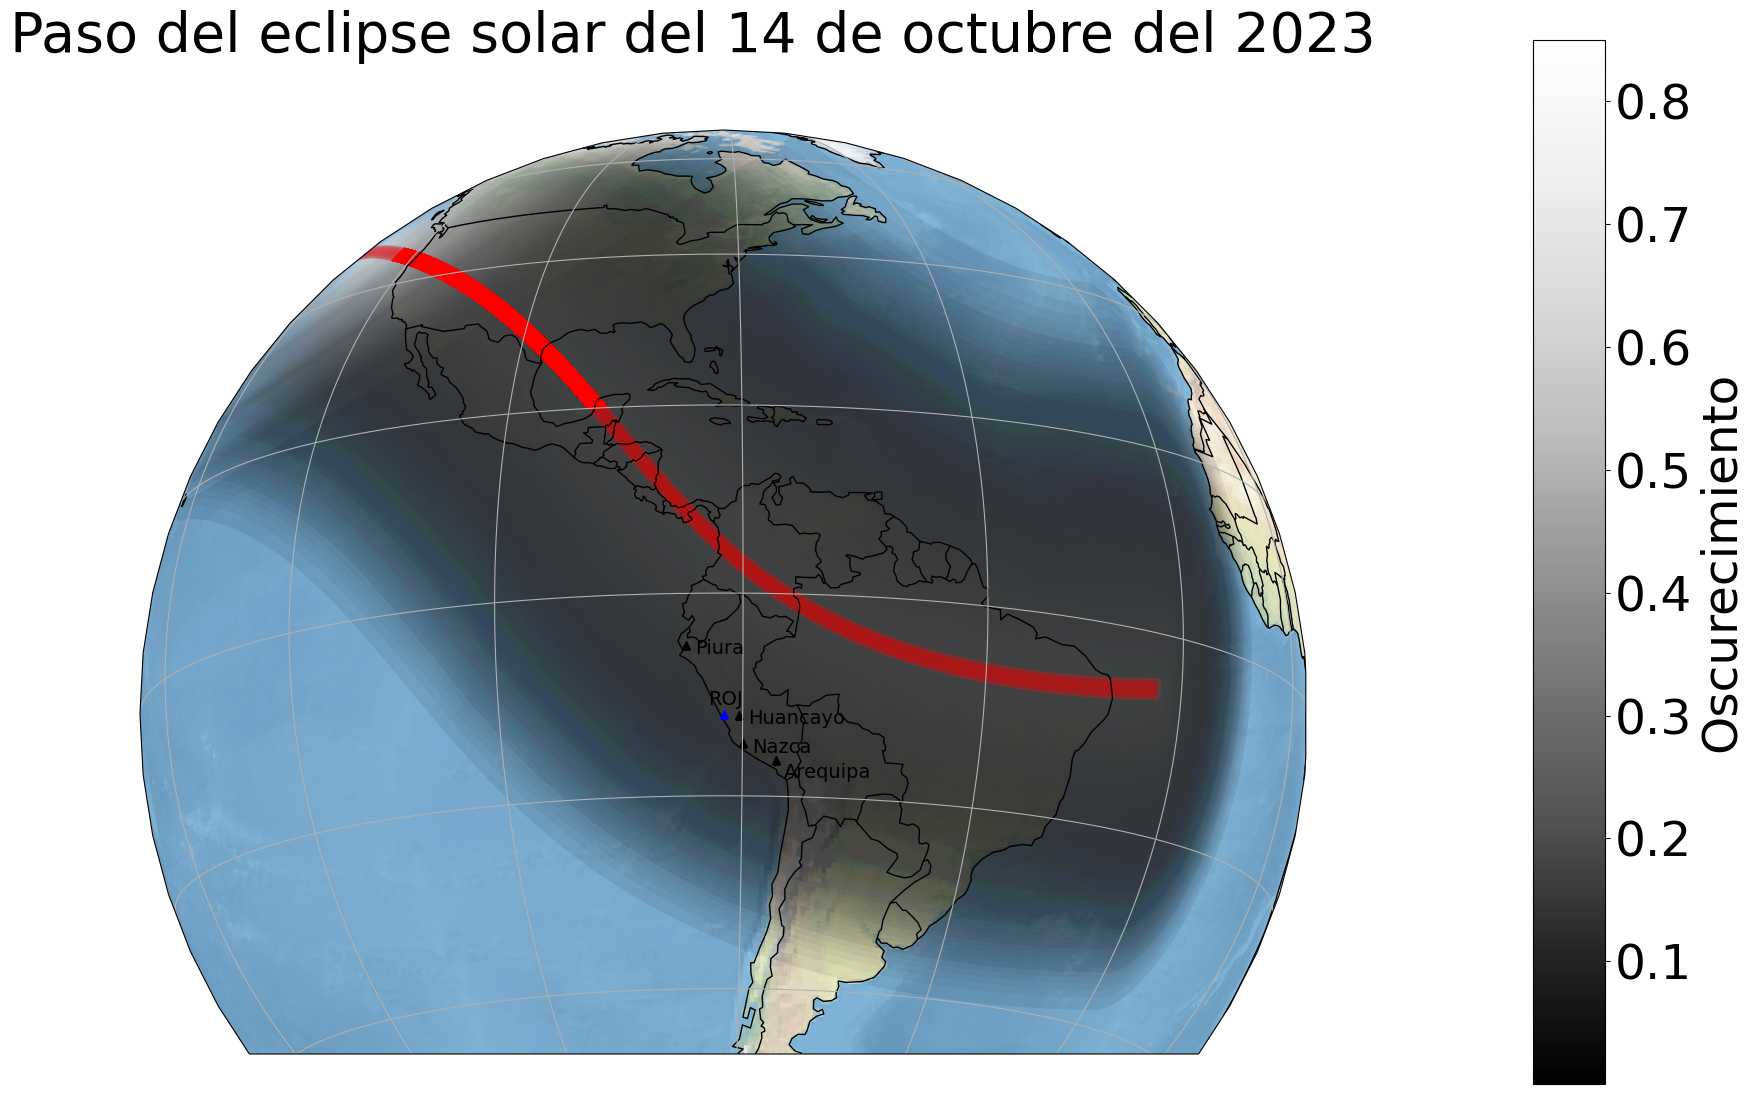

In [67]:

fontsize = 35
fontsize2 = 14
alpha=0.04
offset = 0.9#8.0
cmap = 'Greys_r'#'YlOrBr'#'Oranges'#'YlOrBr', 'YlOrRd'#'grey'
color = 'black'
colored_marker = 'k^'#'b^'
lat, lon = -11.95139,-76.87431
lat_huancayo, lon_huancayo = -12.038333, -75.322778
lat_piura, lon_piura = -5.176692, -80.634643
lat_arequipa, lon_arequipa = -16.3988900, -71.5350000
lat_nazca, lon_nazca = -14.83098, -74.93895
ortho = ccrs.Orthographic(central_longitude=lon, central_latitude=lat)
geo = ccrs.Geodetic()
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(1, 1, 1,projection=ortho)
df2.plot(column='Obscuratio',ax=ax,legend=False,alpha=alpha, transform=geo,cmap=cmap)#,color='grey')
df3.plot(column='Obscuratio',ax=ax,legend=False,alpha=alpha, transform=geo,cmap=cmap)
#,cmap='grey',legend_kwds={"shrink":1.0,"label":'Oscurecimiento'})
df6.plot(ax=ax,color='grey',alpha=0.2, transform=geo)
df7.plot(ax=ax,color='grey',alpha=0.2, transform=geo)
df5.plot(ax=ax,color='red',alpha=0.03, transform=geo)
df4.plot(ax=ax,transform=geo,color='red')
ax.add_feature(cfeature.BORDERS)
ax.plot([lon], [lat], colored_marker, transform=geo)
ax.text(lon-1.8*offset,lat+offset,'ROJ',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_huancayo], [lat_huancayo], colored_marker, transform=geo)
ax.text(lon_huancayo+offset,lat_huancayo-offset,'Huancayo',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_piura], [lat_piura], colored_marker, transform=geo)
ax.text(lon_piura+offset,lat_piura-offset,'Piura',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_arequipa], [lat_arequipa], colored_marker, transform=geo)
ax.text(lon_arequipa+offset,lat_arequipa-2*offset,'Arequipa',color=color,fontsize=fontsize2, transform=geo)
ax.plot([lon_nazca], [lat_nazca], colored_marker, transform=geo)
ax.text(lon_nazca+offset,lat_nazca-offset,'Nazca',color=color,fontsize=fontsize2, transform=geo)
ax.stock_img()
ax.coastlines()
ax.gridlines()
ax.add_feature(cfeature.OCEAN)
#ax.set_extent((-80,-50,-60,50),crs=geo)
#ax.set_extent((-120,-10,-60,60),crs=geo)
cax = fig.add_axes([0.85, 0.085, 0.03, 0.87])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = df2['Obscuratio'].values#[]
cb = fig.colorbar(sm, cax=cax)
cb.ax.tick_params(labelsize=fontsize) 
cb.ax.set_ylabel('Oscurecimiento',fontsize=fontsize)
fig.suptitle('Paso del eclipse solar del 14 de octubre del 2023',fontsize=fontsize+5)#,x=0.6,y=1.05)
plt.savefig('eclipse-path-prime.png',bbox_inches='tight')
#ax.add_feature(land_50m)
#ax.add_feature(cfeature.LAKES)
#


In [ ]:

#str_aux = '+proj=aeqd +lat_0=0 +lon_0=-70'
#wm_crs = world.to_crs(epsg=3857)
#df6_crs = df6.to_crs(epsg=3857)
#df7_crs = df7.to_crs(epsg=3857)
#facecolor = 'sandybrown'
#edgecolor = 'black'
#ocean_color = '#A8C5DD'
#ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.COASTLINE)
#wm_crs = worldmap.to_crs(str_aux,epsg=3857)
#df6_crs = df6.to_crs(str_aux,epsg=3857)
#df7_crs = df7.to_crs(str_aux,epsg=3857)
#df2_crs = df2.to_crs(str_aux,epsg=3857)
#df6_crs = df6.to_crs(epsg=3857)
#df7_crs = df7.to_crs(epsg=3857)
#df2_crs = df2.to_crs(epsg=3857)
#fig, ax = plt.subplots(figsize=(16, 10),subplot_kw={'projection': ccrs.Orthographic(-95, 35)})
#fig, ax = plt.subplots(figsize=(16, 10),subplot_kw={'projection':ccrs.PlateCarree()})
#fig, ax = plt.subplots(figsize=(16, 10),subplot_kw={'projection': ccrs.Orthographic(10, 55)})
#ax.add_feature(cartopy.feature.OCEAN, facecolor=ocean_color, edgecolor='none')

#wm = world.plot(ax=ax,color="lightgrey")
#wm = world.plot(ax=ax, transform=ccrs.PlateCarree(),color='grey')
#wm = wm_crs.plot(ax=ax,edgecolor='k')
#df2.plot(ax=ax, transform=ccrs.PlateCarree(),alpha=0.2,color='grey')#(column='Obscuratio',ax=ax,legend=False,cmap=cmap,alpha=alpha)
#df2_crs.plot(ax=ax,color='gray',alpha=0.2)

#df6.plot(ax=ax,color='red',alpha=0.2, transform=ccrs.PlateCarree())
#df7.plot(ax=ax,color='red',alpha=0.2, transform=ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.OCEAN, facecolor=ocean_color, edgecolor='none')
#cx.add_basemap(ax, url=cx.providers.OpenStreetMap.Mapnik)

#ax.coastlines(resolution='50m')

#ax.gridlines()
# Here we add the transform argument and use the Geodetic projection.
#ax.scatter(lon, lat, transform=ccrs.Geodetic(),marker= 'x')

#ax.add_feature(cfeature.RIVERS)

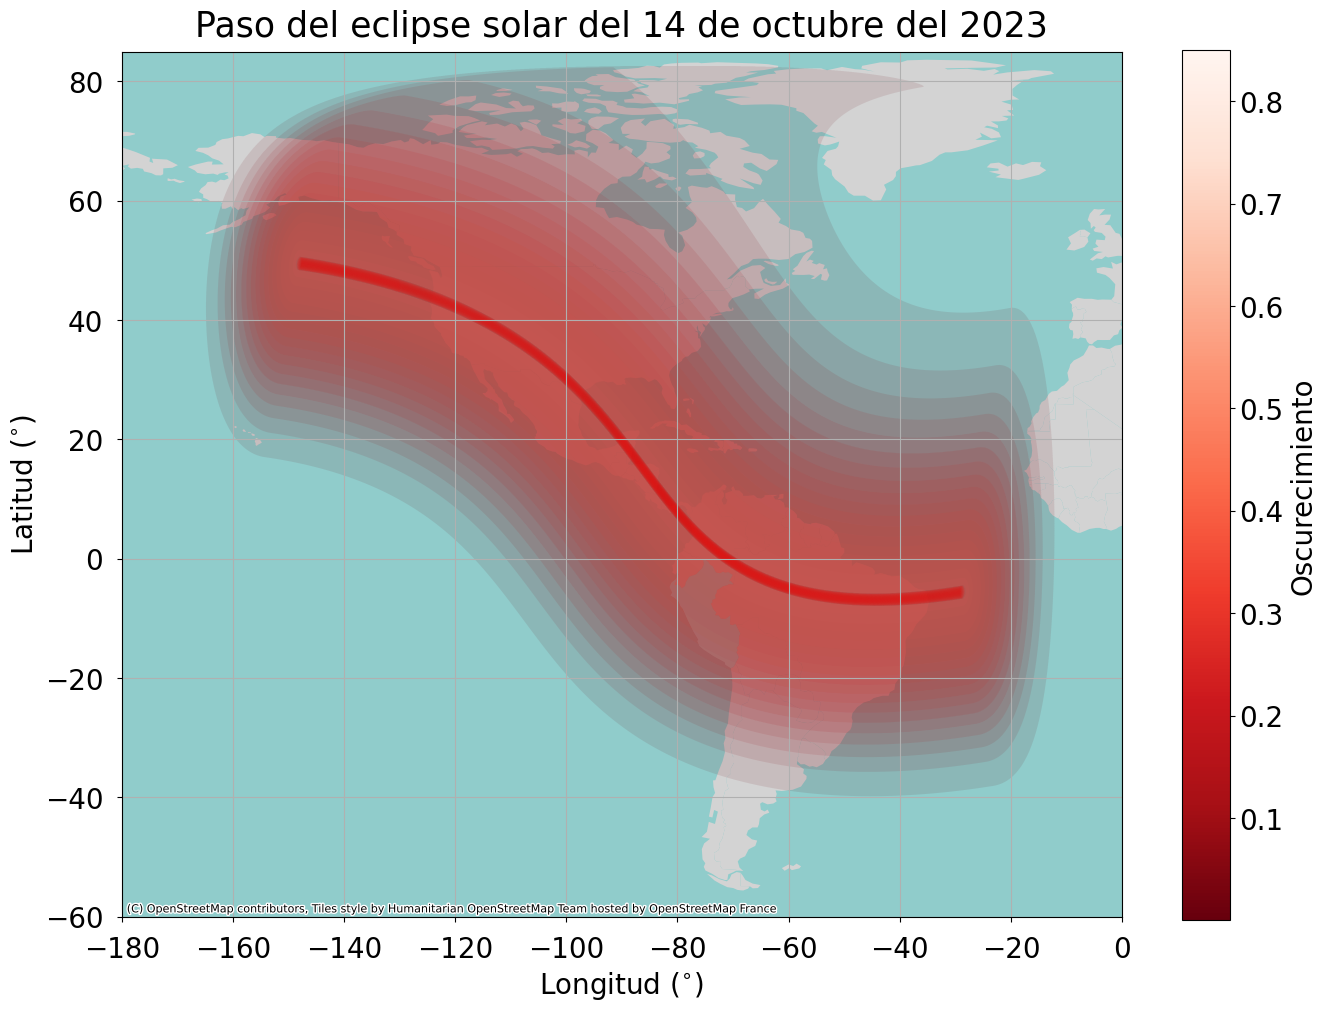

In [40]:
fontsize=20
alpha=0.1

#X, Y = np.meshgrid()
fig, ax = plt.subplots(figsize=(16, 10),constrained_layout=True)
#wm = worldmap.plot(color="lightgrey", ax=ax)#,cmap='magma')
wm = world.plot(color="lightgrey", ax=ax)#,cmap='magma')
#wm =  worldmap.to_crs({'init': 'epsg:3395'}).plot(color="lightgrey", ax=ax)#
#df1.plot(ax=ax,color='black')
#df2.plot(column='Obscuratio',ax=ax,alpha=0.07, vmin=vmin, vmax=vmax)#,legend=True)#,cmap='grey',
         #legend_kwds={"label": "Oscurecimiento", "orientation": "horizontal"})
#cmap='gist_earth_r'
#df2.plot(column='Obscuratio',ax=ax,alpha=0.07,legend=True,cmap='grey',legend_kwds={
#        "shrink":1.0,"label":'Oscurecimiento'})
cmap = "Reds_r"#"Blues_r"#'Greys_r'#'Greys_r'#'grey'#'Greys'#'grey'
df2.plot(column='Obscuratio',ax=ax,legend=False,cmap=cmap,alpha=alpha)
#,cmap='grey',legend_kwds={"shrink":1.0,"label":'Oscurecimiento'})
df6.plot(ax=ax,color='gray',alpha=0.2)
df7.plot(ax=ax,color='gray',alpha=0.2)
peru.plot(ax=ax,color='gray',alpha=0.3)
'''
brazil.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
ecuador.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
colombia.to_crs(epsg=4326).plot(ax=ax, color='lightblue',alpha=0.3)
bolivia.to_crs(epsg=4326).plot(ax=ax, color='lightblue',alpha=0.3)
chile.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
argentina.to_crs(epsg=4326).plot(ax=ax, color='grey',alpha=0.2)
uruguay.to_crs(epsg=4326).plot(ax=ax, color='lightblue',alpha=0.3)
venezuela.to_crs(epsg=4326).plot(ax=ax, color='blue',alpha=0.05)
paraguay.to_crs(epsg=4326).plot(ax=ax, color='blue',alpha=0.05)
#colombia.plot(ax=ax,color='green',alpha=0.2)
#brazil.plot(ax=ax,color='cyan',alpha=0.1)
america.plot(ax=ax,color='black',alpha=0.1)
'''
ax.tick_params(axis='both', labelsize=fontsize,pad=10)
ax.set_xlabel(r'Longitud ($^{\circ}$)',fontsize=fontsize)
ax.set_ylabel(r'Latitud ($^{\circ}$)',fontsize=fontsize)
cx.add_basemap(wm)
#df4.plot(ax=ax,color='red',alpha=0.02)
df5.plot(ax=ax,color='red',alpha=0.03)
ax.set_xlim(-180,0)
ax.set_ylim(-60,85)
ax.grid()
cax = fig.add_axes([0.85, 0.085, 0.03, 0.87])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = df2['Obscuratio'].values#[]
cb = fig.colorbar(sm, cax=cax)
cb.ax.tick_params(labelsize=fontsize) 
cb.ax.set_ylabel('Oscurecimiento',fontsize=fontsize)
fig.suptitle('Paso del eclipse solar del 14 de octubre del 2023',fontsize=fontsize+5)#,x=0.6,y=1.05)
plt.savefig('eclipse-path.png',bbox_inches='tight')

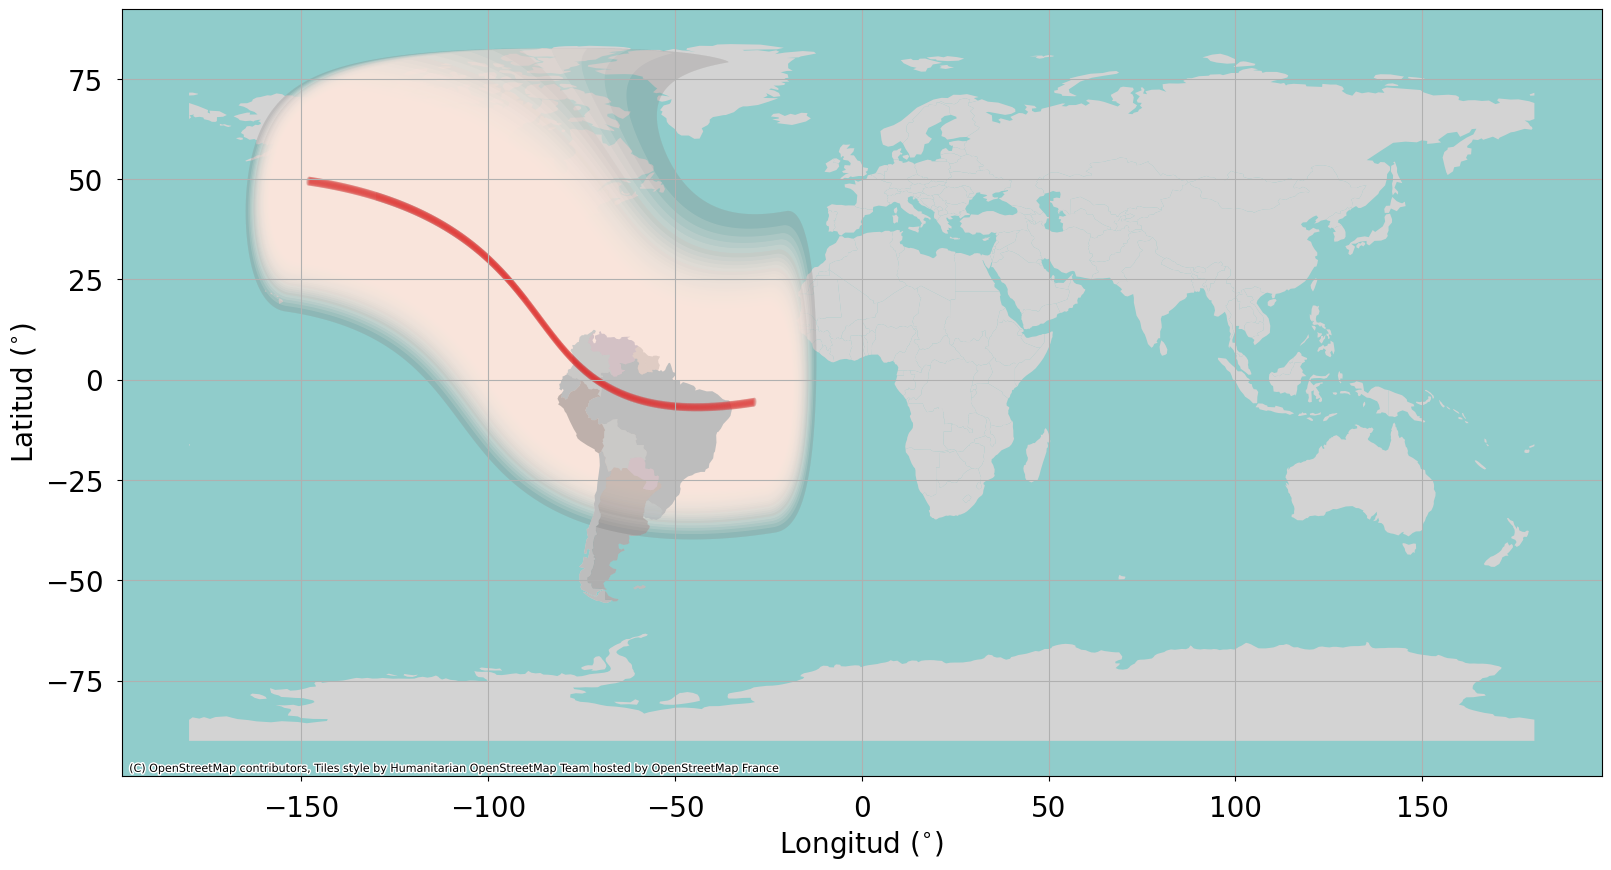

In [87]:
fontsize=20
alpha=0.15

#X, Y = np.meshgrid()
fig, ax = plt.subplots(figsize=(16, 10),constrained_layout=True)
wm = worldmap.plot(color="lightgrey", ax=ax)#,cmap='magma')
#wm = gplt.polyplot(worldmap, projection=gplt.crs.Orthographic(), figsize=(8, 4))
#wm =  worldmap.to_crs({'init': 'epsg:3395'}).plot(color="lightgrey", ax=ax)#
#df1.plot(ax=ax,color='black')
#df2.plot(column='Obscuratio',ax=ax,alpha=0.07, vmin=vmin, vmax=vmax)#,legend=True)#,cmap='grey',
         #legend_kwds={"label": "Oscurecimiento", "orientation": "horizontal"})
#cmap='gist_earth_r'
#df2.plot(column='Obscuratio',ax=ax,alpha=0.07,legend=True,cmap='grey',legend_kwds={
#        "shrink":1.0,"label":'Oscurecimiento'})
cmap = 'gray'#'Greys_r'#'grey'#'Greys'#'grey'
df2.plot(column='Obscuratio',ax=ax,legend=False,cmap=cmap,alpha=alpha)
df3.plot(column='Obscuratio',ax=ax,legend=False,cmap='Reds',alpha=alpha)

#,cmap='grey',legend_kwds={"shrink":1.0,"label":'Oscurecimiento'})
df6.plot(ax=ax,color='gray',alpha=0.2)
df7.plot(ax=ax,color='gray',alpha=0.2)
peru.plot(ax=ax,color='gray',alpha=0.3)
brazil.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
ecuador.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
colombia.to_crs(epsg=4326).plot(ax=ax, color='lightblue',alpha=0.3)
bolivia.to_crs(epsg=4326).plot(ax=ax, color='lightblue',alpha=0.3)
chile.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
argentina.to_crs(epsg=4326).plot(ax=ax, color='grey',alpha=0.2)
uruguay.to_crs(epsg=4326).plot(ax=ax, color='lightblue',alpha=0.3)
venezuela.to_crs(epsg=4326).plot(ax=ax, color='blue',alpha=0.05)
paraguay.to_crs(epsg=4326).plot(ax=ax, color='blue',alpha=0.05)
#colombia.plot(ax=ax,color='green',alpha=0.2)
#brazil.plot(ax=ax,color='cyan',alpha=0.1)
america.plot(ax=ax,color='black',alpha=0.1)
ax.tick_params(axis='both', labelsize=fontsize,pad=10)
ax.set_xlabel(r'Longitud ($^{\circ}$)',fontsize=fontsize)
ax.set_ylabel(r'Latitud ($^{\circ}$)',fontsize=fontsize)
cx.add_basemap(wm)
#df4.plot(ax=ax,color='red',alpha=0.02)
df5.plot(ax=ax,color='red',alpha=0.03)
#ax.set_xlim(-180,0)
#ax.set_ylim(-60,85)
ax.grid()

In [42]:
df.head()

NameError: name 'df' is not defined

In [43]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [44]:
worldmap

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [45]:
from shapely.geometry import shape
#data = pd.read_json( filename_jro )
#data.from_features()
#nta['the_geom'] = nta['the_geom'].apply(shape)
#nta_geo = gpd.GeoDataFrame(nta)#.set_geometry('geometry')
#df_jro = gpd.GeoDataFrame(data.json())

/home/jp/miniconda3/envs/geo_env/lib/python3.12/site-packages/geoplot/geoplot.py:703: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  warnings.warn(


<GeoAxes: >

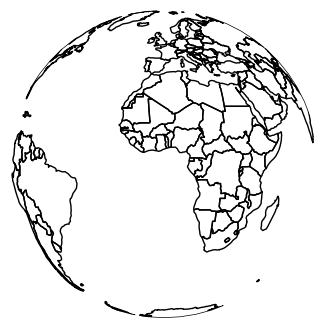

In [89]:
#geoplot.polyplot(worldmap, projection=geoplot.crs.Orthographic(), figsize=(8, 4))

In [48]:
import cartopy.crs as ccrs

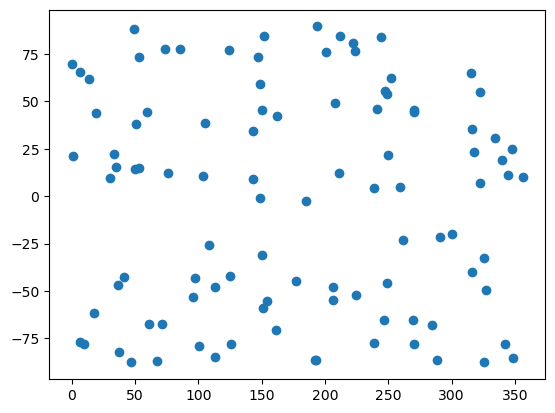

In [49]:
np.random.seed(1)
x = 360 * np.random.rand(100)
y = 180 * np.random.rand(100) - 90

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
lon = x
lat = y

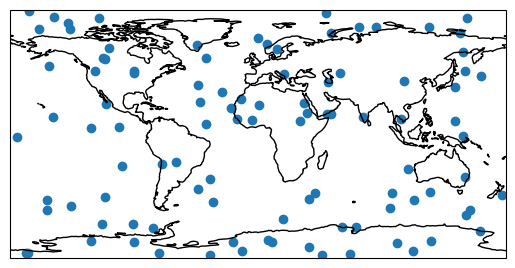

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()

/tmp/ipykernel_25646/846950359.py:11: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  df2.plot(column='Obscuratio',ax=ax,legend=False,alpha=0.6, transform=ccrs.Geodetic(),color='grey')


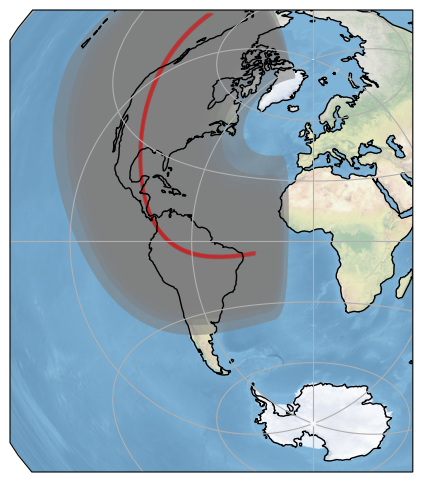

In [51]:
to_lon = 0#-20.398329  # East is positive.
to_lat = 0#3.660924
lat, lon = -11.95139,-76.87431
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.AzimuthalEquidistant(central_longitude=to_lon,
                                                          central_latitude=to_lat))
# Here we add the transform argument and use the Geodetic projection.
#ax.scatter(lon, lat, transform=ccrs.Geodetic(),marker= 'x')
df2.plot(column='Obscuratio',ax=ax,legend=False,alpha=0.6, transform=ccrs.Geodetic(),color='grey')
#,cmap='grey',legend_kwds={"shrink":1.0,"label":'Oscurecimiento'})
df6.plot(ax=ax,color='gray',alpha=0.2, transform=ccrs.Geodetic())
df7.plot(ax=ax,color='gray',alpha=0.2, transform=ccrs.Geodetic())
df5.plot(ax=ax,color='red',alpha=0.03, transform=ccrs.Geodetic())

ax.set_extent([-150, 50, -80, 80])
ax.stock_img()
ax.coastlines()
ax.gridlines()


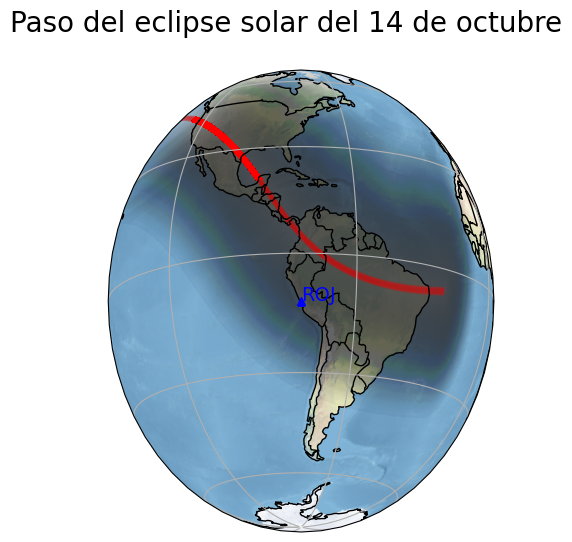

In [90]:
fontsize = 18
lat, lon = -11.95139,-76.87431
ortho = ccrs.Orthographic(central_longitude=lon, central_latitude=lat)
geo = ccrs.Geodetic()

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1,projection=ortho)
ax.stock_img()
#ax.coastlines(resolution='50m')
ax.coastlines()
ax.gridlines()
# Here we add the transform argument and use the Geodetic projection.
#ax.scatter(lon, lat, transform=ccrs.Geodetic(),marker= 'x')
df2.plot(column='Obscuratio',ax=ax,legend=False,alpha=0.02, transform=geo,cmap='grey')#,color='grey')
df3.plot(column='Obscuratio',ax=ax,legend=False,alpha=0.02, transform=geo,cmap='grey')
#,cmap='grey',legend_kwds={"shrink":1.0,"label":'Oscurecimiento'})
df6.plot(ax=ax,color='gray',alpha=0.2, transform=geo)
df7.plot(ax=ax,color='gray',alpha=0.2, transform=geo)
df5.plot(ax=ax,color='red',alpha=0.03, transform=geo)
df4.plot(ax=ax,transform=geo,color='red')
ax.add_feature(cfeature.BORDERS)
ax.plot([lon], [lat], 'b^', transform=geo)
ax.text(lon,lat,'ROJ',color='blue',fontsize=fontsize-4)
#ax.set_xlabel(r'Longitud ($^\circ$)',fontsize=fontsize)
#ax.set_ylabel(r'Latitud ($^\circ$)',fontsize=fontsize)
#peru.plot(ax=ax,transform=geo)
#ax.set_extent([-150, 50, -80, 80])
fig.suptitle('Paso del eclipse solar del 14 de octubre',fontsize=fontsize+2)
#ax.set_global()
plt.savefig('orthographic-projection-october-14-eclipse.png',bbox_inches='tight')

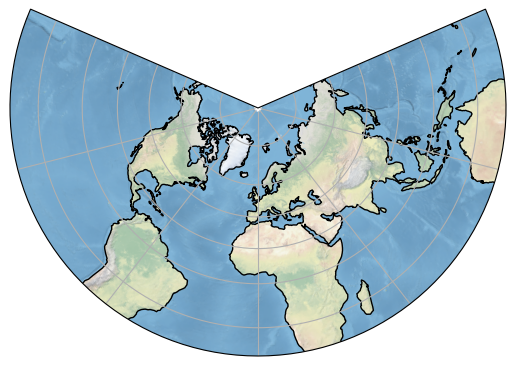

In [227]:
canada_east = -63
canada_west = -123
canada_north = 30#75
canada_south = -40#37
standard_parallels = (0,20)#(49, 77)
central_longitude = 0#-(91 + 52 / 60)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.LambertConformal(central_longitude=central_longitude))#,
                                                      #standard_parallels=standard_parallels))
#ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.stock_img()
ax.coastlines()
ax.gridlines()

/home/jp/miniconda3/envs/geo_env/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/jp/miniconda3/envs/geo_env/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/jp/miniconda3/envs/geo_env/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/jp/miniconda3/envs/geo_env/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url

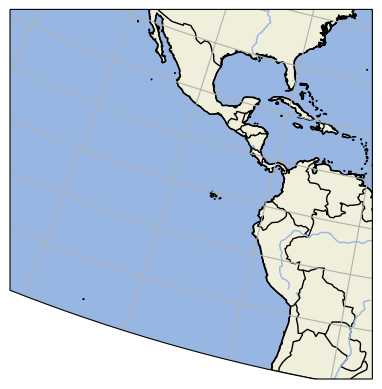

In [217]:

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.LambertConformal(central_longitude=central_longitude,
                                                      standard_parallels=standard_parallels))
ax.set_extent([canada_west, canada_east, canada_south, canada_north])
ax.gridlines()
ax.add_feature(land_50m)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)
